In [47]:
from typing import TypedDict , List
from langgraph.graph import StateGraph , START , END
import random

In [48]:
class AgentState(TypedDict):
    target: int
    playername : str
    guesses: List[int]
    attempts: int
    lowerbound: int
    upperbound: int
    result: str

In [49]:
def setupNode(state: AgentState)->AgentState:
    print(f"Starting game for {state['playername']}")
    state['attempts'] = 0
    state['lowerbound'] = 1
    state['upperbound'] = 20
    state['guesses'] = []
    print(f"Target is : {state['target']}. Range:{state['lowerbound']}-{state['upperbound']}")
    return state

In [50]:
def guessNode(state: AgentState)->AgentState:
    state['attempts'] += 1
    guess = random.randint(state['lowerbound'] , state['upperbound'])
    print(f" Attempt {state['attempts']} : Boss , I guess {guess}")
    state['guesses'].append(guess)
    return state

In [51]:
def hintNode(state: AgentState)->AgentState:
    last_guess = state['guesses'][-1]
    target = state["target"]
    if state['attempts'] >= 7:
        state['result'] = "Over"
        return state
    if last_guess == target:
        state['result'] = "Found it"
        return state
    elif last_guess > target:
        state['upperbound'] = last_guess - 1
        state['result'] = 'lower'
        print(f"Too high! New range: {state['lowerbound']} to {state['upperbound']}")
        return state
    else:
        state['lowerbound'] = last_guess + 1
        state['result'] = "higher"
        print(f"Too low ! New range: {state['lowerbound']} to {state['upperbound']}")
        return state
    

In [52]:
def decisionLogic(state: AgentState)->str:
    result = state['result']
    if result == "Over":
        print("\n Game over: Attempts Exhausted")
        return "exitEdge"
    elif result == "Found it":
        print(f"\n Success! Found {state['target']} in {state['attempts']} tries.")
        return "exitEdge"
    else:
        return "continueEdge"

In [53]:
graph = StateGraph(AgentState)
graph.add_node("setup" , setupNode)
graph.add_node("guess", guessNode)
graph.add_node("hint" , hintNode)

graph.add_edge(START , "setup")
graph.add_edge("setup" , "guess")
graph.add_edge("guess" , "hint")

graph.add_conditional_edges(
    "hint",
    decisionLogic,{
        "exitEdge":END,
        "continueEdge":"guess"
    }
)

app = graph.compile()


    

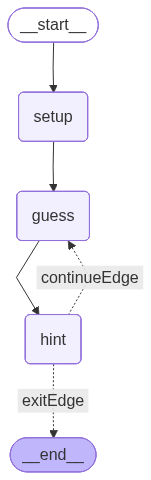

In [54]:
app

In [55]:
input_data = {
    "playername": "jaiwanth",
    "target" : 13
}

In [56]:
result = app.invoke(input_data)


Starting game for jaiwanth
Target is : 13. Range:1-20
 Attempt 1 : Boss , I guess 4
Too low ! New range: 5 to 20
 Attempt 2 : Boss , I guess 11
Too low ! New range: 12 to 20
 Attempt 3 : Boss , I guess 19
Too high! New range: 12 to 18
 Attempt 4 : Boss , I guess 15
Too high! New range: 12 to 14
 Attempt 5 : Boss , I guess 14
Too high! New range: 12 to 13
 Attempt 6 : Boss , I guess 12
Too low ! New range: 13 to 13
 Attempt 7 : Boss , I guess 13

 Game over: Attempts Exhausted
